# Installing neccessary libraries

In [1]:
# !pip install matplotlib
# !pip install seaborn
# !pip install pillow

In [2]:
import pathlib
from pathlib import Path
import numpy as np
import os
import seaborn as sns
import pandas as pd
from PIL import Image as PILImage
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import Image

In [3]:
train_string="./data_augmented/train"

train_path = pathlib.Path(train_string)

train_data = list(train_path.glob('*/*.jpeg'))

In [4]:
subpath = list(train_path.glob('*'))
species = []
boxplot_data = []

for i in range (0, len(subpath)):
    species.append(subpath[i].name)
    boxplot_data.append([subpath[i].name, len(os.listdir(subpath[i]))])

species.sort()

In [5]:
species_string='Species'
no_of_files_string='No of files'

no_of_files = pd.DataFrame(columns=[species_string, no_of_files_string], data=boxplot_data)
list_of_species_to_augment = []

for index, row in no_of_files.iterrows():
    if row[no_of_files_string] <= 3000:
        list_of_species_to_augment.append(row[species_string])
        
list_of_species_to_augment       
len(list_of_species_to_augment)

49

In [6]:
list_of_species_to_augment

['1355932',
 '1355990',
 '1356075',
 '1356257',
 '1356382',
 '1356781',
 '1357635',
 '1358094',
 '1358095',
 '1358133',
 '1358689',
 '1358766',
 '1359498',
 '1359616',
 '1360978',
 '1361656',
 '1361823',
 '1361824',
 '1362490',
 '1363130',
 '1363336',
 '1363764',
 '1364159',
 '1364164',
 '1367432',
 '1369887',
 '1374048',
 '1384485',
 '1385937',
 '1389510',
 '1393241',
 '1393423',
 '1393425',
 '1393614',
 '1394382',
 '1394420',
 '1394454',
 '1394591',
 '1396824',
 '1397268',
 '1397364',
 '1398178',
 '1398592',
 '1400100',
 '1408774',
 '1408961',
 '1409238',
 '1418146',
 '1435714']

# Data augmentation example
Firstly we set the paths and find the images we want to display

In [7]:
image_paths_to_show = [
    './display_images/original.jpg',
    './display_images/vertical.jpg',
    './display_images/horizontal.jpg'
]

images = []
for img_path in image_paths_to_show:
    images.append(mpimg.imread(img_path))

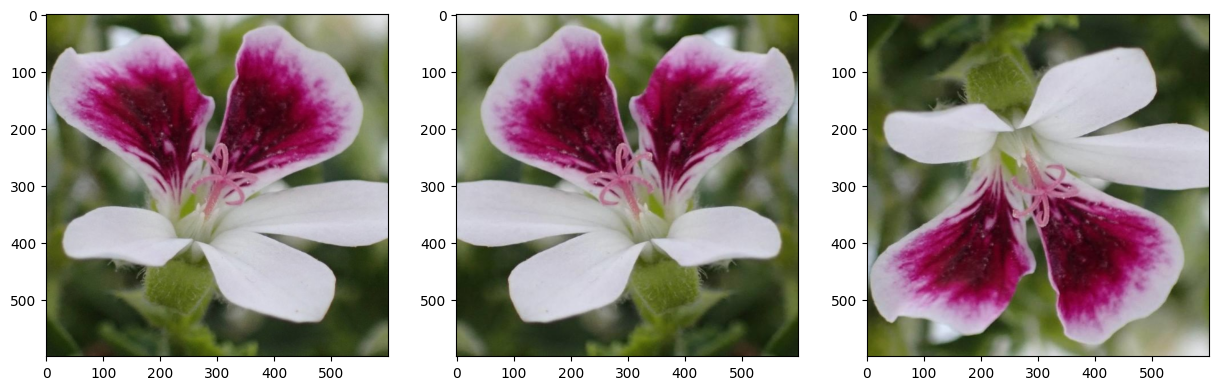

In [8]:
plt.figure(figsize=(15,15))
columns = 3
for i, image in enumerate(images):
    plt.subplot(int(len(images) / columns + 1), columns, i+1)
    plt.imshow(image)

In [9]:
for index in species:
    if(index in list_of_species_to_augment):
        train_path = pathlib.Path(train_string+'/'+index+'/')
        subpath = list(train_path.glob('*'))
        for i in range (0, len(subpath)):
            img = PILImage.open(train_string+'/'+index+'/'+subpath[i].name)
            vertical_img = img.transpose(method=PILImage.FLIP_LEFT_RIGHT)
            vertical_img.save(train_string+'/'+index+'/vertical_'+subpath[i].name)
            horizontal_img = img.transpose(method=PILImage.FLIP_TOP_BOTTOM)
            horizontal_img.save(train_string+'/'+index+'/horizontal_'+subpath[i].name)

In [10]:
train_path = pathlib.Path(train_string)
subpath = list(train_path.glob('*'))
species = []
boxplot_data = []

for i in range (0, len(subpath)):
    species.append(subpath[i].name)
    boxplot_data.append([subpath[i].name, len(os.listdir(subpath[i]))])

species.sort()

In [11]:
no_of_files = pd.DataFrame(columns=[species_string, no_of_files_string], data=boxplot_data)

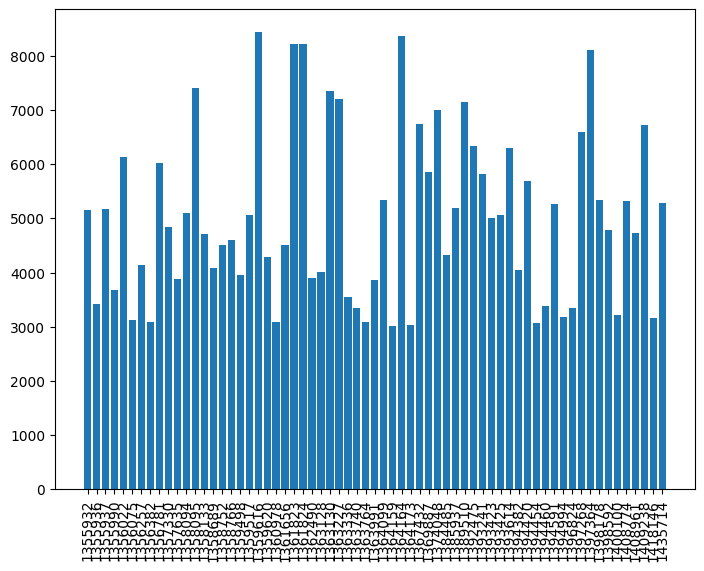

In [12]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plot_species = no_of_files[species_string]
plot_numbers = no_of_files[no_of_files_string]
ax.bar(plot_species,plot_numbers)
plt.xticks(rotation = 90)
plt.show()

# Here we augment new data
We augment those species that have around 3000 images and are not one of the previously augmented species. 
We will just flip these images vertically so that all species will have roughly the same number of images.

In [13]:
list_of_new_species_to_augment = []

no_of_files = pd.DataFrame(columns=[species_string, no_of_files_string], data=boxplot_data)
list_of_new_species_to_augment = []

for index, row in no_of_files.iterrows():
    if row[no_of_files_string] <= 4000:
        list_of_new_species_to_augment.append(row[species_string])
        
list_of_new_species_to_augment       
len(list_of_new_species_to_augment)

20

In [14]:
for index in species:
    if((index in list_of_new_species_to_augment) and (index not in list_of_species_to_augment)):
        train_path = pathlib.Path(train_string+'/'+index+'/')
        subpath = list(train_path.glob('*'))
        for i in range (0, len(subpath)):
            img = PILImage.open(train_string+'/'+index+'/'+subpath[i].name)
            vertical_img = img.transpose(method=PILImage.FLIP_LEFT_RIGHT)
            vertical_img.save(train_string+'/'+index+'/vertical_'+subpath[i].name)
#             horizontal_img = img.transpose(method=PILImage.FLIP_TOP_BOTTOM)
#             horizontal_img.save('./data_augmented/train/'+index+'/horizontal_'+subpath[i].name)

# We can check the data again

In [15]:
train_path = pathlib.Path(train_string)
subpath = list(train_path.glob('*'))
species = []
boxplot_data = []

for i in range (0, len(subpath)):
    species.append(subpath[i].name)
    boxplot_data.append([subpath[i].name, len(os.listdir(subpath[i]))])

species.sort()

In [16]:
no_of_files = pd.DataFrame(columns=[species_string, no_of_files_string], data=boxplot_data)

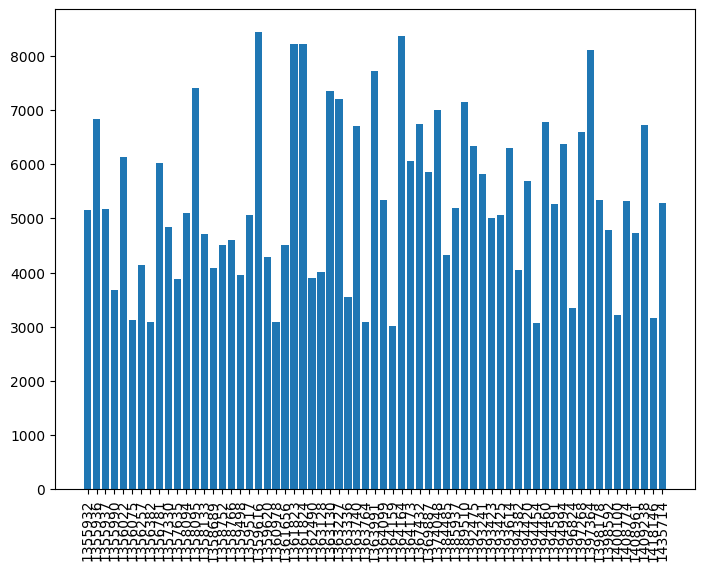

In [17]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plot_species = no_of_files[species_string]
plot_numbers = no_of_files[no_of_files_string]
ax.bar(plot_species,plot_numbers)
plt.xticks(rotation = 90)
plt.show()